# Predicting Economic Outcomes From Macroeconomic Variables Following the Collapse of Communism in the Eastern Bloc, 1990-2000
### Mikhail Khrenov, CMSC320 - 0101

Following the series of revolutions and peaceful transitions of power that occurred within the former Soviet bloc starting in 1989, culminating in the collapse of the Soviet Union itself in 1991, over 20 nations made the transition from a centrally planned economy to an open market one. While some nations were able to handle the transition very well and soon saw large increases in GDP and standards of living (Poland, Estonia, etc.) others saw a decade of disastrous economic collapse, with the nation being asset-stripped, GDP per capita plummeting, and mortality rates rising dramatically (Russia, Ukraine, Moldova, etc.).

There has been significant debate on what was the cause for this disparity of outcomes, with geopolitics, foreign aid, internal political structures, and the rates of each nation's economic liberalization and privatization all undoubtedly playing a role in how things turned out. However, for the purposes of this project we are interested in one particular facet of this issue: to what degree could success in the market era be predicted by a nation's macro-economic measures prior to the collapse of communism?

For the rest of this tutorial, we will be taking you through our analysis and the code you would need to perform it yourself and present the results of our investigation.

## Data Collection and Curation

For the purposes of our analysis we will look at economic indicators for the 15 constituent Soviet Socialist Republics of the Soviet Union, as well as the non-Soviet members of the Warsaw Pact, the military alliance of socialist states that defined the Eastern Bloc.

We will retrieve our data from the World Bank, which hosts open data on a host of economic indicators for practically every country in the world at [data.worldbank.org](https://data.worldbank.org). In our particular case, we have downloaded tables for GDP per capita, PPP (constant 2017 international Dolars) as CSVs and will manipulate them, using them as a metric for economic success/failure in the post-collapse decade. By looking at GDP Per Capita, we are able to normalize for the effects of total population on size on the economy, looking at the economic productivity per citizen. Additionally, by quantifying this in Purchasing Power Parity, we are able to look at the real material wealth an average citizen could leverage within each nation, normalizing for commodity prices differences. Finally, we take all data in constant 2017 Internation Dollars to account for inflation. This way we can see the real trends in economic productivity.

As we will be looking at a handful of economic indicators over a decade, with one measurement per country per year, a Pandas dataframe will more than suffice to hold and manipulate our data.

In [1]:
# Hide ugly warning messages
import warnings
warnings.filterwarnings('ignore')

# Import necessary tools
import pandas as pd
import numpy as np

# Load data from CSV
gdppc_ppp = pd.read_csv('API_NY.GDP.PCAP.PP.KD_DS2_en_csv_v2_2252322.csv')

gdppc_ppp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,34329.774218,35563.310960,35458.608343,37276.080417,37866.173853,38442.413838,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2075.491747,2116.465454,2102.385234,2068.265904,2057.062164,2058.383832,2033.779002,2065.036398,NaN,NaN
2,Angola,AGO,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297,NaN,NaN
3,Albania,ALB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790,NaN,NaN
4,Andorra,AND,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As can be seen above, the original organization of the data from the World Bank has the years as columns and the countries as rows. It also includes data for nations we are not interested in. To make work a bit faster and easier going forward, we will define a list of country codes of interest encompassing the aforementioned Soviet and Warsaw Pact nations. Additionally, we will be looking at the decade immediately following the collapse of the communist system, and so we will only need to consider the columns representing years 1990 to 2000.

In [2]:
nations_of_interest = set(['RUS', 'AZE', 'ARM', 'BLR', 'KAZ', 'KGZ', 'CZE', 'LVA', 'EST', 'LTU', 'BGR', 'POL', 'HUN', 'GEO', 'UKR', 'MDA', 'TJK', 'TKM', 'UZB', 'ROU'])
years_of_interest = [str(x) for x in range(1990, 2001)]

# Keep only countries we care about and years we care about
gdppc_ppp = gdppc_ppp[gdppc_ppp['Country Code'].isin(nations_of_interest)]
gdppc_ppp = gdppc_ppp[['Country Name', 'Country Code'] + years_of_interest]
gdppc_ppp

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
8,Armenia,ARM,5180.050954,4616.933000,2735.788923,2554.174446,2757.229291,3008.234256,3234.061455,3378.935803,3654.057670,3798.671291,4048.257817
13,Azerbaijan,AZE,7758.154036,7585.179517,5782.650277,4379.814078,3469.770316,3025.293877,3033.830388,3178.977396,3463.842010,3687.661015,4063.471641
19,Bulgaria,BGR,12109.314905,11196.990786,10494.797945,10422.256489,10647.831507,11000.720623,11625.841957,10036.725436,10536.906388,9718.678477,10233.849916
23,Belarus,BLR,8895.476512,8784.420451,7924.014893,7305.342583,6458.186142,5805.266913,5987.785689,6698.744568,7296.054591,7575.918326,8053.173638
52,Czech Republic,CZE,23660.493357,20962.604185,20835.106763,20826.344959,21424.507469,22831.269237,23832.838829,23734.869398,23672.656760,24024.856674,25056.260940
69,Estonia,EST,NaN,NaN,NaN,11947.568641,12005.358567,12774.860838,13604.669589,15556.081135,16386.353297,16272.255813,17830.358676
80,Georgia,GEO,11135.462889,8724.290499,4769.996524,3346.568025,3045.042484,3243.846213,3740.485453,4268.695273,4511.488803,4737.405516,4919.231880
99,Hungary,HUN,NaN,16477.357246,15978.713603,15904.785653,16395.952203,16663.356672,16705.760366,17265.592040,17980.738680,18585.503459,19468.490371
118,Kazakhstan,KAZ,13475.639898,11918.591370,11294.736578,10323.870124,9154.928193,8552.785645,8726.725019,9016.416013,8999.104219,9330.532288,10275.761871
120,Kyrgyz Republic,KGZ,5158.317569,4671.522849,3978.909913,3362.829000,2688.351778,2517.284450,2656.017720,2877.098569,2893.417534,2954.954123,3078.909251


As can be seen in the above table, there are unfortunately several missing datapoints in our set, and we will have to somehow deal with this. In the case of Hungary, we are only missing data for 1990. While this will not be strictly accurate, we can fill in that single value by taking a linear extrapolation from the values for 1991 and 1992 and tracing the trend backwards. In the cases of Lithuania, Latvia, Moldova, and Estonia, unfortunately too much data is missing for us to fill it in with any degree of accuracy and so these rows will be dropped. Additionally, as we will later be looking at Oil Rents, since Armenia lacks any data for that parameter we must drop them as well.

In [3]:
# Extrapolate for Hungary in 1990
gdppc_ppp.at[99,'1990'] = gdppc_ppp.at[99,'1991'] + (gdppc_ppp.at[99,'1991'] - gdppc_ppp.at[99,'1992'])

# Drop nations with too much missing data
for x in ['LTU', 'LVA', 'EST', 'MDA', 'ARM']:
    nations_of_interest.remove(x) 
gdppc_ppp = gdppc_ppp[gdppc_ppp['Country Code'].isin(nations_of_interest)]
gdppc_ppp

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
13,Azerbaijan,AZE,7758.154036,7585.179517,5782.650277,4379.814078,3469.770316,3025.293877,3033.830388,3178.977396,3463.842010,3687.661015,4063.471641
19,Bulgaria,BGR,12109.314905,11196.990786,10494.797945,10422.256489,10647.831507,11000.720623,11625.841957,10036.725436,10536.906388,9718.678477,10233.849916
23,Belarus,BLR,8895.476512,8784.420451,7924.014893,7305.342583,6458.186142,5805.266913,5987.785689,6698.744568,7296.054591,7575.918326,8053.173638
52,Czech Republic,CZE,23660.493357,20962.604185,20835.106763,20826.344959,21424.507469,22831.269237,23832.838829,23734.869398,23672.656760,24024.856674,25056.260940
80,Georgia,GEO,11135.462889,8724.290499,4769.996524,3346.568025,3045.042484,3243.846213,3740.485453,4268.695273,4511.488803,4737.405516,4919.231880
99,Hungary,HUN,16976.000890,16477.357246,15978.713603,15904.785653,16395.952203,16663.356672,16705.760366,17265.592040,17980.738680,18585.503459,19468.490371
118,Kazakhstan,KAZ,13475.639898,11918.591370,11294.736578,10323.870124,9154.928193,8552.785645,8726.725019,9016.416013,8999.104219,9330.532288,10275.761871
120,Kyrgyz Republic,KGZ,5158.317569,4671.522849,3978.909913,3362.829000,2688.351778,2517.284450,2656.017720,2877.098569,2893.417534,2954.954123,3078.909251
188,Poland,POL,11351.089086,10517.375316,10748.869673,11122.358796,11686.357540,12499.447905,13253.750213,14099.260750,14748.281950,15436.070475,16309.553722
199,Romania,ROU,13344.927090,11722.391958,10791.723182,10971.634007,11419.622051,12156.034583,12667.502479,12087.998388,11867.171935,11841.046291,12148.200099


Having obtained the data we need, we can start looking for trends.

## Exploratory Data Analysis

First, we would like to get an overall sense of how the various post-communist states faired in the decade following the market transition. We can do this by looking at the GDP per capita (PPP) over time. Note: throughout this analysis we will be using the plotting library MatPlotLib, whose documentation can be found [here](https://matplotlib.org/stable/contents.html).

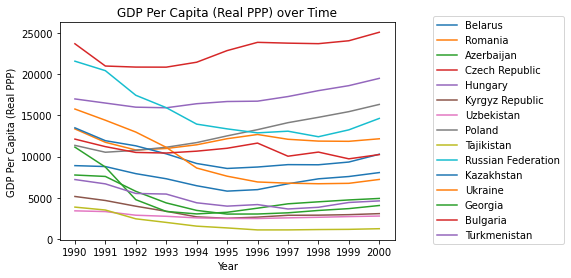

In [4]:
import matplotlib.pyplot as plt

# Plot each nation's GDP per Capita over time
for country in nations_of_interest:
    country_name = gdppc_ppp[gdppc_ppp['Country Code'] == country]['Country Name'].values.tolist()[0]
    raw_gdppc_ppp = gdppc_ppp[gdppc_ppp['Country Code'] == country][years_of_interest].values.tolist()[0]
    plt.plot(years_of_interest, raw_gdppc_ppp, label=country_name)
    
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('GDP Per Capita (Real PPP) over Time')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (Real PPP)')
plt.show()

While there's a lot going on in a plot of this many national GDP per capita trends, one can clearly see that the trends over the course of the 90s did differ significantly between nations, with some, like Poland and Hungary closing out the decade with a higher real per capita GDP than they started with, while others, such as Russia and Ukraine, see a precipitous decline that only somewhat starts to turn around post-1998.

We can quantify this net economic progress/recession by taking a net % GDP per Capita change between 1990 and 2000 for each nation.

In [5]:
# Calculate net percent changein GDP Per Capita (PPP) from 1990 to 2000 for each nation
gdppc_ppp['Net Change'] = 100 * (gdppc_ppp['2000'] - gdppc_ppp['1990'])/gdppc_ppp['1990']
gdppc_ppp.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,Net Change
13,Azerbaijan,AZE,7758.154036,7585.179517,5782.650277,4379.814078,3469.770316,3025.293877,3033.830388,3178.977396,3463.842010,3687.661015,4063.471641,-47.623215
19,Bulgaria,BGR,12109.314905,11196.990786,10494.797945,10422.256489,10647.831507,11000.720623,11625.841957,10036.725436,10536.906388,9718.678477,10233.849916,-15.487788
23,Belarus,BLR,8895.476512,8784.420451,7924.014893,7305.342583,6458.186142,5805.266913,5987.785689,6698.744568,7296.054591,7575.918326,8053.173638,-9.468890
52,Czech Republic,CZE,23660.493357,20962.604185,20835.106763,20826.344959,21424.507469,22831.269237,23832.838829,23734.869398,23672.656760,24024.856674,25056.260940,5.899148
80,Georgia,GEO,11135.462889,8724.290499,4769.996524,3346.568025,3045.042484,3243.846213,3740.485453,4268.695273,4511.488803,4737.405516,4919.231880,-55.823732


We can take a look at the overall distribution of net gains/losses in a histogram.

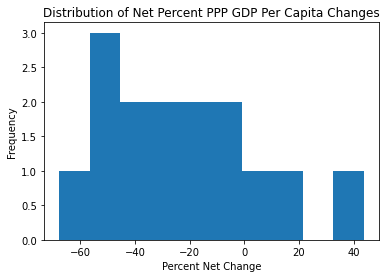

In [6]:
plt.hist(gdppc_ppp['Net Change'])
plt.title('Distribution of Net Percent PPP GDP Per Capita Changes')
plt.xlabel('Percent Net Change')
plt.ylabel('Frequency')
plt.show()

As we can see, the vast majority of post-communist states saw a significant percent net decrease in their PPP GDP Per Capita over the following decade. A few, however, did see increases, so there is basis for comparison on each side.

We would now like to plot this net percent change versus other macroeconomic indicators *as of 1990* to see if there are any clear correlations. The macroeconomic factors we will be looking at will be GDP in PPP (in constant 2017 International $s), Oil Rents as \% of GDP, and strangely enough GDP per Capita in PPP. The data for these factors was also drawn from the World Bank and processed the same way GDP Per Capita was, with CSVs included in this repository.

### 1990 Total GDP
The first metric we will consider is each nation's total GDP in 1990 (in PPP, 2017 International Dollars). Intuitively, we would like to know whether the total size of a nation's economy was a good predictor of how it did in the coming decade. As the communist system was highly centralized and its collapse meant a rise in trade barriers, and breakdown of large systems, we would expect total size to have some effect. On the one hand, the centralized system pulled resources inwards towards Moscow, on the other, it also supported peripheral states with little production of their own through military spending. As a result, this could go either way.

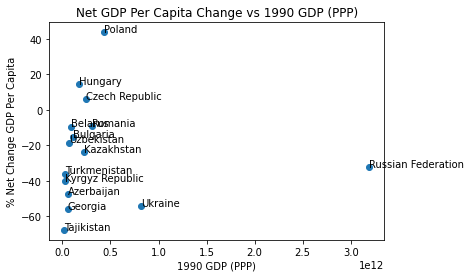

In [7]:
# Get data from CSV
total_gdp = pd.read_csv('API_NY.GDP.MKTP.PP.KD_DS2_en_csv_v2_2252309.csv')
total_gdp = total_gdp[total_gdp['Country Code'].isin(nations_of_interest)]
total_gdp = total_gdp[['Country Name', 'Country Code'] + years_of_interest]

# Extrapolate for Hungary in 1990
total_gdp.at[99,'1990'] = total_gdp.at[99,'1991'] + (total_gdp.at[99,'1991'] - total_gdp.at[99,'1992'])

gdppc_ppp['1990 GDP PPP'] = total_gdp['1990']

# Plot scatterplot and add appropriate labels
plt.scatter(gdppc_ppp['1990 GDP PPP'], gdppc_ppp['Net Change'])
    
for country, total, change in zip(gdppc_ppp['Country Name'], gdppc_ppp['1990 GDP PPP'], gdppc_ppp['Net Change']):
    plt.annotate(country, (total, change))
    
plt.title('Net GDP Per Capita Change vs 1990 GDP (PPP)') # change labels
plt.xlabel('1990 GDP (PPP)')
plt.ylabel('% Net Change GDP Per Capita')
plt.show()

The initial plot is not highly informative as Russia skews it far to the right with its large economy. To get a clearer view we can apply a logarithm.

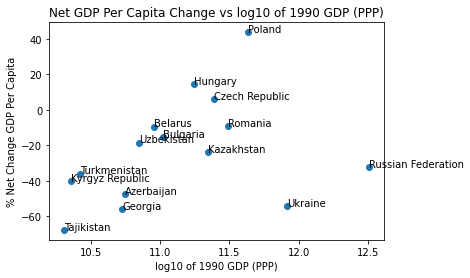

In [8]:
plt.scatter(np.log10(gdppc_ppp['1990 GDP PPP']), gdppc_ppp['Net Change'])
    
for country, total, change in zip(gdppc_ppp['Country Name'], gdppc_ppp['1990 GDP PPP'], gdppc_ppp['Net Change']):
    plt.annotate(country, (np.log10(total), change))
    
plt.title('Net GDP Per Capita Change vs log10 of 1990 GDP (PPP)')
plt.xlabel('log10 of 1990 GDP (PPP)')
plt.ylabel('% Net Change GDP Per Capita')
plt.show()

Having applied a logarithm, there does appear to be a general positive trend in terms of larger economies in 1990 being more succesful. Notably, Ukraine and Russia appear to be outliers, underperforming despite their large size.

### 1990 Oil Rents (\% GDP)
The next variable we will look it is how much of a nations economy in 1990 consisted of oil profits. Since wealth arising from natural resource extraction has a different elasticity to that from other means, we may see differences between nations with more or less reliance.

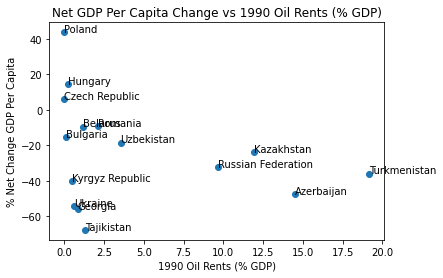

In [9]:
oil_rents = pd.read_csv('API_NY.GDP.PETR.RT.ZS_DS2_en_csv_v2_2252325.csv')
oil_rents = oil_rents[oil_rents['Country Code'].isin(nations_of_interest)]
oil_rents = oil_rents[['Country Name', 'Country Code'] + years_of_interest]
gdppc_ppp['1990 Oil Rents'] = oil_rents['1990']

plt.scatter(gdppc_ppp['1990 Oil Rents'], gdppc_ppp['Net Change'])
    
for country, oil, change in zip(gdppc_ppp['Country Name'], gdppc_ppp['1990 Oil Rents'], gdppc_ppp['Net Change']):
    plt.annotate(country, (oil, change))
    
plt.title('Net GDP Per Capita Change vs 1990 Oil Rents (% GDP)')
plt.xlabel('1990 Oil Rents (% GDP)')
plt.ylabel('% Net Change GDP Per Capita')
plt.show()

While the initial plot doesn't show a clear linear trend, there does seem to be a general correlation between lower oil rents meaning a more positive change in GDP per Capita. In order to see this trend more clearly, we can apply a log base 10 transformation onto the Oil Rents

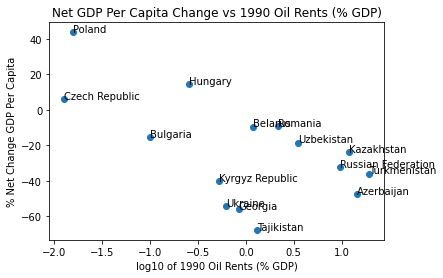

In [10]:
plt.scatter(np.log10(gdppc_ppp['1990 Oil Rents']), gdppc_ppp['Net Change'])
    
for country, oil, change in zip(gdppc_ppp['Country Name'], gdppc_ppp['1990 Oil Rents'], gdppc_ppp['Net Change']):
    plt.annotate(country, (np.log10(oil), change))
    
plt.title('Net GDP Per Capita Change vs 1990 Oil Rents (% GDP)') # change labels
plt.xlabel('log10 of 1990 Oil Rents (% GDP)')
plt.ylabel('% Net Change GDP Per Capita')
plt.show()

The trend becomes much clearer (and quite linear looking) after taking the logarithm of 1990 oil rents. So it would seem to appear, that in general, the more reliant a nation was on oil revenue when the fall of communism came, the worse it faired in the transition to a market economy.

### 1990 GDP Per Capita
The last variable we will look at will be the initial GDP per capita. In essence, did those nations that started ahead stay ahead, or did they have further to fall?

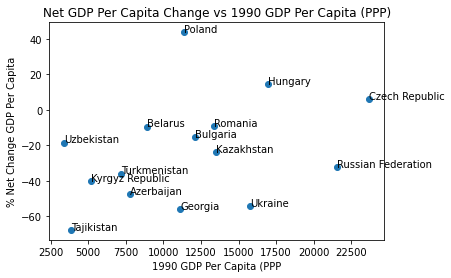

In [11]:
gdppc_ppp['1990 GDP Per Capita'] = gdppc_ppp['1990']

plt.scatter(gdppc_ppp['1990 GDP Per Capita'], gdppc_ppp['Net Change'])
    
for country, start, change in zip(gdppc_ppp['Country Name'], gdppc_ppp['1990 GDP Per Capita'], gdppc_ppp['Net Change']):
    plt.annotate(country, (start, change))
    
plt.title('Net GDP Per Capita Change vs 1990 GDP Per Capita (PPP)')
plt.xlabel('1990 GDP Per Capita (PPP')
plt.ylabel('% Net Change GDP Per Capita')
plt.show()

By inspection, there appears to be a general positive trend, though Ukrain, Poland, and Russia are all outliers.

## Modeling and Hypothesis Testing

As we now have have three promising features (log10 of 1990 GDP (PPP), log10 of 1990 Oil Rents (% GDP), and 1990 GDP Per Capita (PPP)), we can construct a model to predict the net change in GDP per capita based off of these variables. Given that we have a relatively small number of features, the trends we found in our exploratory data analysis were relatively linear, and we would like to yield a relatively explainable model, a multivariate linear regression seems like the best choice.

In order to do this, we can use StatsModels [Ordinary Least Squares](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) model, which will perform a standard multivariate linear regression and provide summary statistics.

In [12]:
import statsmodels.api as sm

gdppc_ppp['log10 of 1990 GDP PPP'] = np.log10(gdppc_ppp['1990 GDP PPP'])
gdppc_ppp['log10 of 1990 Oil Rents'] = np.log10(gdppc_ppp['1990 Oil Rents'])

xs = gdppc_ppp[['log10 of 1990 GDP PPP', 'log10 of 1990 Oil Rents', '1990 GDP Per Capita']].values
xs = sm.add_constant(xs)
ys = gdppc_ppp['Net Change'].values

model = sm.OLS(ys,xs)
lr = model.fit()
lr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.274   
Dependent Variable: y                AIC:                142.8569
Date:               2021-05-17 16:57 BIC:                145.6891
No. Observations:   15               Log-Likelihood:     -67.428 
Df Model:           3                F-statistic:        2.760   
Df Residuals:       11               Prob (F-statistic): 0.0924  
R-squared:          0.429            Scale:              640.81  
------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
------------------------------------------------------------------
const    -228.7672  186.6839  -1.2254  0.2460  -639.6556  182.1212
x1         19.2511   18.3490   1.0492  0.3166   -21.1348   59.6371
x2        -17.3928    7.3945  -2.3521  0.0383   -33.6679   -1.1177
x3         -0.0008    0.0020  -0.3836  0.7086    -0.0051    0.0036
-----------------------------------------------------------------
Omnibus:              1.474        Durbin-Watson:          2.707 
Prob(Omnibus):        0.479        Jarque-Bera (JB):       1.170 
Skew:                 -0.609       Prob(JB):               0.557 
Kurtosis:             2.375        Condition No.:          375232
=================================================================
* The condition number is large (4e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

Looking at the summary statistics for the fitted linear model, specifically the p-values in the column P<|t|, we can see that for a significance level of $\alpha=0.05$, the only statistically significant coefficient was that of the second variable. In our case this was the the log10 of 1990 Oil Rents as percent of GDP. As such, it seems reasonable to suggest that there is some correlation between how much a communist nation's economy depended on oil in 1990 could help predict how well it did in the 90s.

Beyond looking at the p-values, we would also like to evaluate our model by considering the residuals. Specifically, did they form a normal unimodal distribution? We can do so by calculating the residuals and and plotting a histogram.

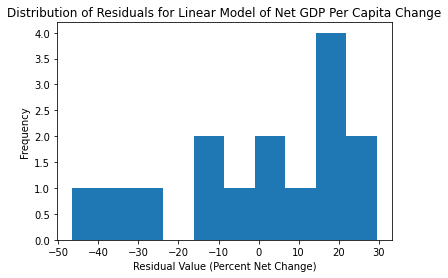

In [13]:
gdppc_ppp['Predicted'] = lr.fittedvalues

gdppc_ppp['Residuals'] = gdppc_ppp['Net Change'] - gdppc_ppp['Predicted']

plt.hist(gdppc_ppp['Residuals'])
plt.title('Distribution of Residuals for Linear Model of Net GDP Per Capita Change')
plt.xlabel('Residual Value (Percent Net Change)')
plt.ylabel('Frequency')
plt.show()

As we can see, the distribution appears generally unimodal and centered on 0. However, it is not entirely symmetric, being more skew negative than positive. This would suggest that there are important features that we are missing to get a truly good linear model.

Finally, to look at how individual countries fit/didn't fit our model, we can plot a bar chart of each nation's residual

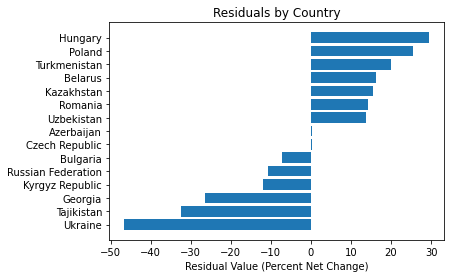

In [14]:
# Sort countries by residual
sortedish = gdppc_ppp.sort_values('Residuals')

# Plot bars
plt.barh(sortedish['Country Name'], sortedish['Residuals'])
plt.title('Residuals by Country')
plt.xlabel('Residual Value (Percent Net Change)')
plt.show()

Looking at the above plot, we can see that Hungary and Poland both significantly outperformed our model, while Georgia, Tajikistan, and especially Ukraine significantly underperformed it given their respective parameters in 1990. While it is entirely possible that the leadership of these nations made unusual, dramatic decisions over the course of the 90s that this model necessarilly can not include, it is also possible that there are additional, more granular variables that could improve our predictions but are not easily available at the macroeconomic level.

# Conclusions

Having looked at the data for the economic consequences of the collapse of communism, compared various trends and relationships, and having attempted to model and predict the economic consequences from the macroeconomic variables for each nation known in 1990, we can speak to what we have succeeded and what we have failed to learn.

We have succeeded in finding a statistically significant correlation between the log of oil rents and the net change in GDP per Capita (in PPP) for the nations under consideration, with the conclusion being that that nations that relied more on oil revenue as portion of their economy at the start of the transition to market economies in general suffered worse than those that did not.

However, we have also learned that this only tells a small part of the story. While the relationship between oil rents and net change in GDP per Capita appears to be real, it is necessarilly confounded with variables of geography, political power distribution within the Soviet Union and Eastern Bloc as they fell, and cultural willingness to adapt to the new realities. After applying our model, we found that certain nations significantly outperformed what we would expect, while others significantly underperformed.

Ultimately, the actionability of these insights is limited given the fact that this is more of a historical study and there isn't a truly communist geo-political structure on the verge of collapse on the scale of the Soviet Union and the Eastern Bloc these days (that we know of). However, the study of the consequences of such enormous changes in political and economic systems and how different structures and actors adapt to them is more generalizably interesting and useful when looking at nations transitioning to more market liberal forms, or those transitioning out from authoritarian regimes. What happens in the immediate aftermath of such a rapid change can shape generations to come, and so can mistakes made during them.

## Further Reading and Resources
For those interested in more on the collapse of the Soviet Union and Eastern Bloc:
- Eberstadt, Nicholas. “The Dying Bear: Russia’s Demographic Disaster.” Foreign Affairs95 (Dec.2011). [Link](https://www.aei.org/articles/the-dying-bear-russias-demographic-disaster/).
- Heintz, Jim. “20 Years Later, Ex-USSR Is a Cracked Mosaic.” Cecil Whig(Aug. 2011). [Link](https://www.heraldnet.com/news/20-years-later-ex-ussr-is-a-cracked-mosaic-of-promise-and-concern/).
- McFaul,  Michael.  “After  Empire:  Soviet  Legacies–Political  Transitions.” Harvard  InternationalReview XXVIII.1 (2006). [Link](https://www.researchgate.net/publication/294174861_Political_transitions_Democracy_and_the_former_soviet_union).
- Rutland,  Peter.  “Ten  Years  After  the  Fall–The  Meaning  of  1989.” Transitions  (Prague,  CzechRepublic)(1999): 24–28. Print.
- Silitski, Vitali. “After Empire: Soviet Legacies–Still Soviet.” Harvard International ReviewXXVIII.1(Aug. 2006). Print.

For those interest in more sophisticated machine learning techniques, we recommend the SciKit learn documentation, found [here](https://scikit-learn.org/stable/index.html), with the LinearRegression module being a [good starting point](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
